# SUPPORT VECTOR MACHINE (SVM)
Create by Khoirul Romadhony (POWERARE)

## KONSEP DASAR

### DECISION BOUNDARY

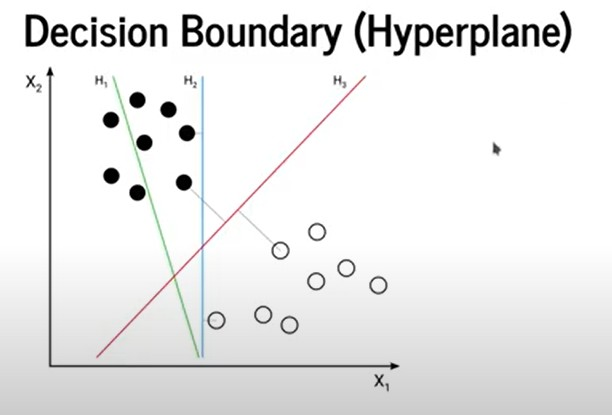

Pada gambar diatas terlihat jelas plot fitur dua dimensi dari dua class hitam dan putih dengan beberapa garis diantaranya (H1, H2 dan H3). Support Vector Machine menggunakan garis tersebut sebagai pemisah antara dua class hitam dan putih, namun tahukah kalian garis mana yang paling baik dalam memisahkan kedua class tersebut ?
   
Jawabannya ialah garis H3 dikarenakan dapat memisahkan kedua class dengan baik dan memiliki margin yang lebih luas, Garis tersebut dinamakan Decision Boundary, dimana decision boundary ini juga dapat disebut sebagai hyperplane(untuk menyederhanakan istilah).

Pada SVM Decision Boundary (DB) memiliki beberapa macam tergantung pada jumlah fitur yang ada. Berikut beberapa macamnya,

<ol>
    <li>Untuk jumlah feature 1 maka DB akan berupa titik (threshold)</li>
    <li>Untuk jumlah feature 2 maka DB akan berupa garis</li>
    <li>Untuk jumlah feature 3 maka DB akan berupa bidang</li>
    <li>Untuk jumlah feature 4 atau lebih maka DB akan berupa bidang multi dimensi atau dinamakan hyperplane</li>
</ol>



### MAXIMUM MARGIN

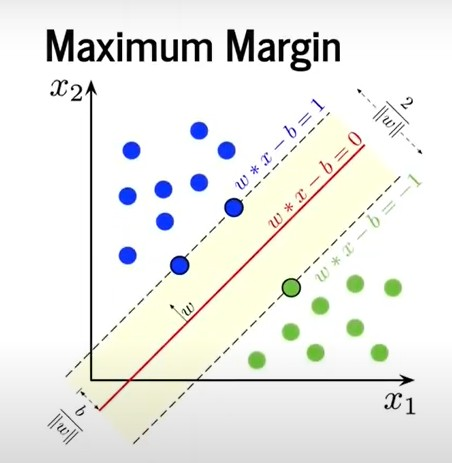

Berikutnya mengenai margin, margin merupakan jarak terdekat decision boundary dengan anggota class, margin sendiri pada gambar diatas diilustrasikan dengan area berwarna kuning. Untuk anggota yang memiliki jarak terdekat dedngan decision boundary dapat disebut sebagai support vector, pada penentuan decision boundary sendiri dipilih berdasarkan margin maximum terhadap support vector.

### LINEARLY INSEPERABLE & KERNEL TRICKS

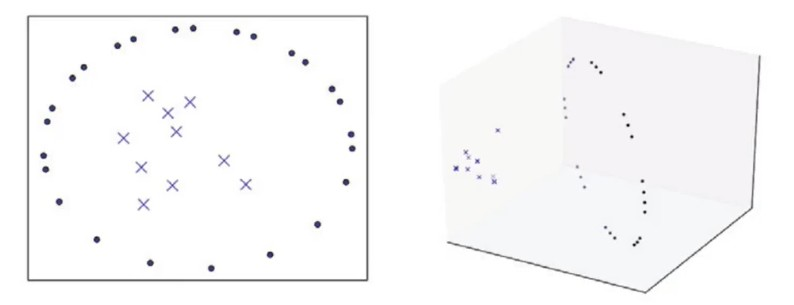

Dalam menentukan Decision Boundary linear terdapat beberapa kasus dimana class tidak dapat dipisahkan dengan menggunakan garis linear seperti gambar diatas hal ini disebut juga sebagai **Linearly Inseperable**. Dalam menyelesaikan masalah ini maka svm akan memproyeksikan data yang ada ke dimensi yang lebih tinggi dan dapat digunakan **Kernel Tricks**.

Pemanfaatan Support Vector dan Kernel Tricks ini dalam mebentuk Desicion Boundary inilah yang menjadikan model machine learning ini Support Vector Machine.

### DATASET : THE MNIST DATABASE OF HANDWRITTEN DIGITS

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home = './Machine Learning/mnist', return_X_y = True)
X.shape

(70000, 784)

In [2]:
X[:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


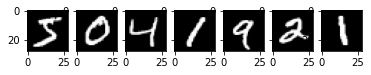

In [3]:
import matplotlib.pyplot as plt
#Color map
import matplotlib.cm as cm 
import numpy as np

pos = 1
X = np.array(X)
for data in X[range(7)]:
    plt.subplot(1, 7, pos)
    plt.imshow(data.reshape((28, 28)),
               cmap = cm.Greys_r)
    plt.axis('on')
    pos += 1
    
plt.show()

In [4]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
from sklearn.model_selection import train_test_split

X_train = X[:1000]
X_test = X[69000:]
y_train = y[:1000]
y_test = y[69000:]

### SUPPORT VECTOR CLASSIFIER (SVC)

In [9]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [10]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



### HYPERPARAMETER TUNING DENGAN `GridSearchCV`

In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
             }

grid_search = GridSearchCV(estimator = SVC(random_state = 0),
                           param_grid = parameters,
                           n_jobs = 4,
                           verbose = 1,
                           scoring = 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=4,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [19]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Score: 0.907
Best Parameters:
	kernel: rbf
	C: 10
	gamma: scale


### PREDICT & EVALUATE

In [20]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.99      0.98       119
           2       0.87      0.85      0.86        99
           3       0.99      0.89      0.94       102
           4       0.91      0.95      0.93        92
           5       0.92      0.89      0.90        85
           6       0.93      0.94      0.94       102
           7       0.93      0.93      0.93       115
           8       0.89      0.95      0.92        94
           9       0.92      0.88      0.90        90

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000

